In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#Set Visualization Style
sns.set(style='whitegrid')

In [4]:
#Load the Data
df = pd.read_csv('/content/TSLA-2.csv')

In [5]:
#First Few Rows
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [6]:
#Check for Missing Values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3562 non-null   object 
 1   Open       3562 non-null   float64
 2   High       3562 non-null   float64
 3   Low        3562 non-null   float64
 4   Close      3562 non-null   float64
 5   Adj Close  3562 non-null   float64
 6   Volume     3562 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 194.9+ KB
None


**Data Cleaning**

In [7]:
#Convert 'Date' column to Datetime
df['Date'] = pd.to_datetime(df['Date'])

#Check for Missing Values
print(df.isnull().sum())

#Drop any rows with missing Values
df.dropna(inplace=True)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**Exploratory Data Analysis (EDA)**

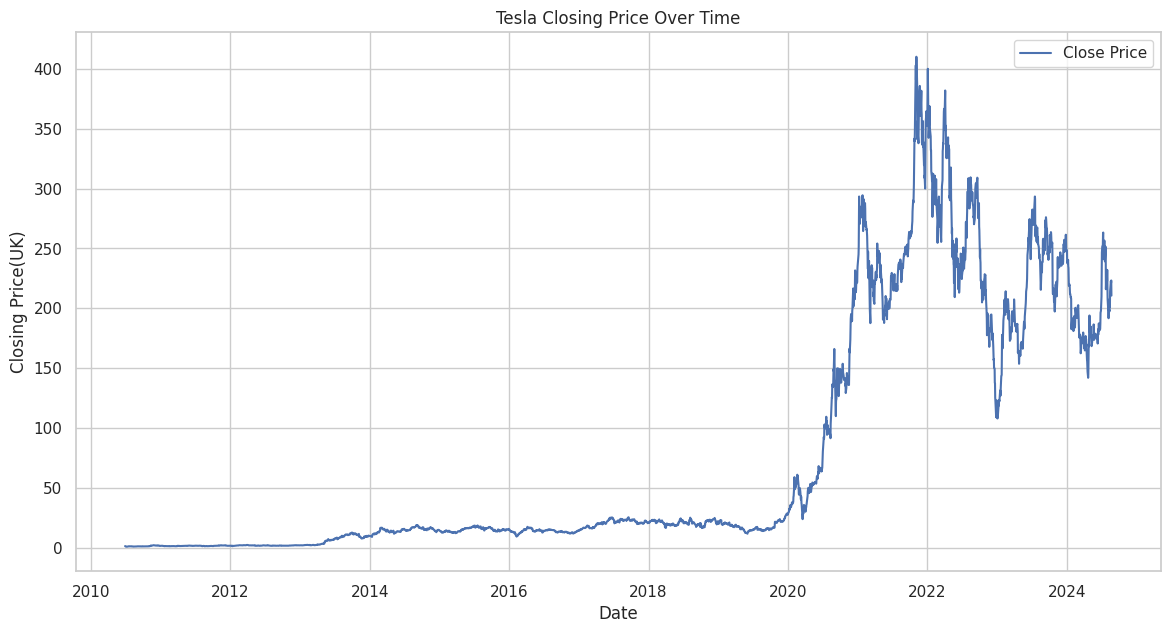

In [8]:
#Plotting the closing price over time
plt.figure(figsize=(14,7))
plt.plot(df['Date'],df['Close'], label='Close Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price(UK)')
plt.legend()
plt.show()

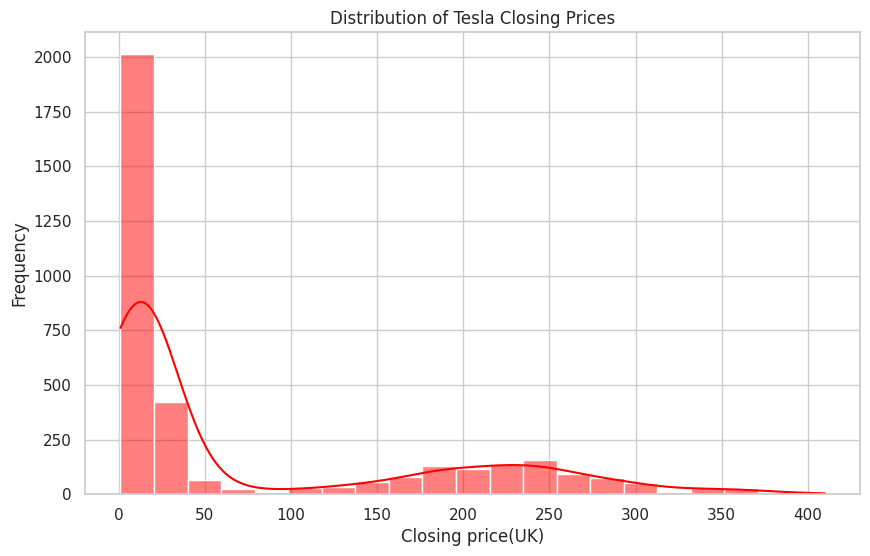

In [9]:
#Visualize the distribution of the closing price
plt.figure(figsize=(10,6))
sns.histplot(df['Close'], kde=True, color='red')
plt.title('Distribution of Tesla Closing Prices')
plt.xlabel('Closing price(UK)')
plt.ylabel('Frequency')
plt.show()

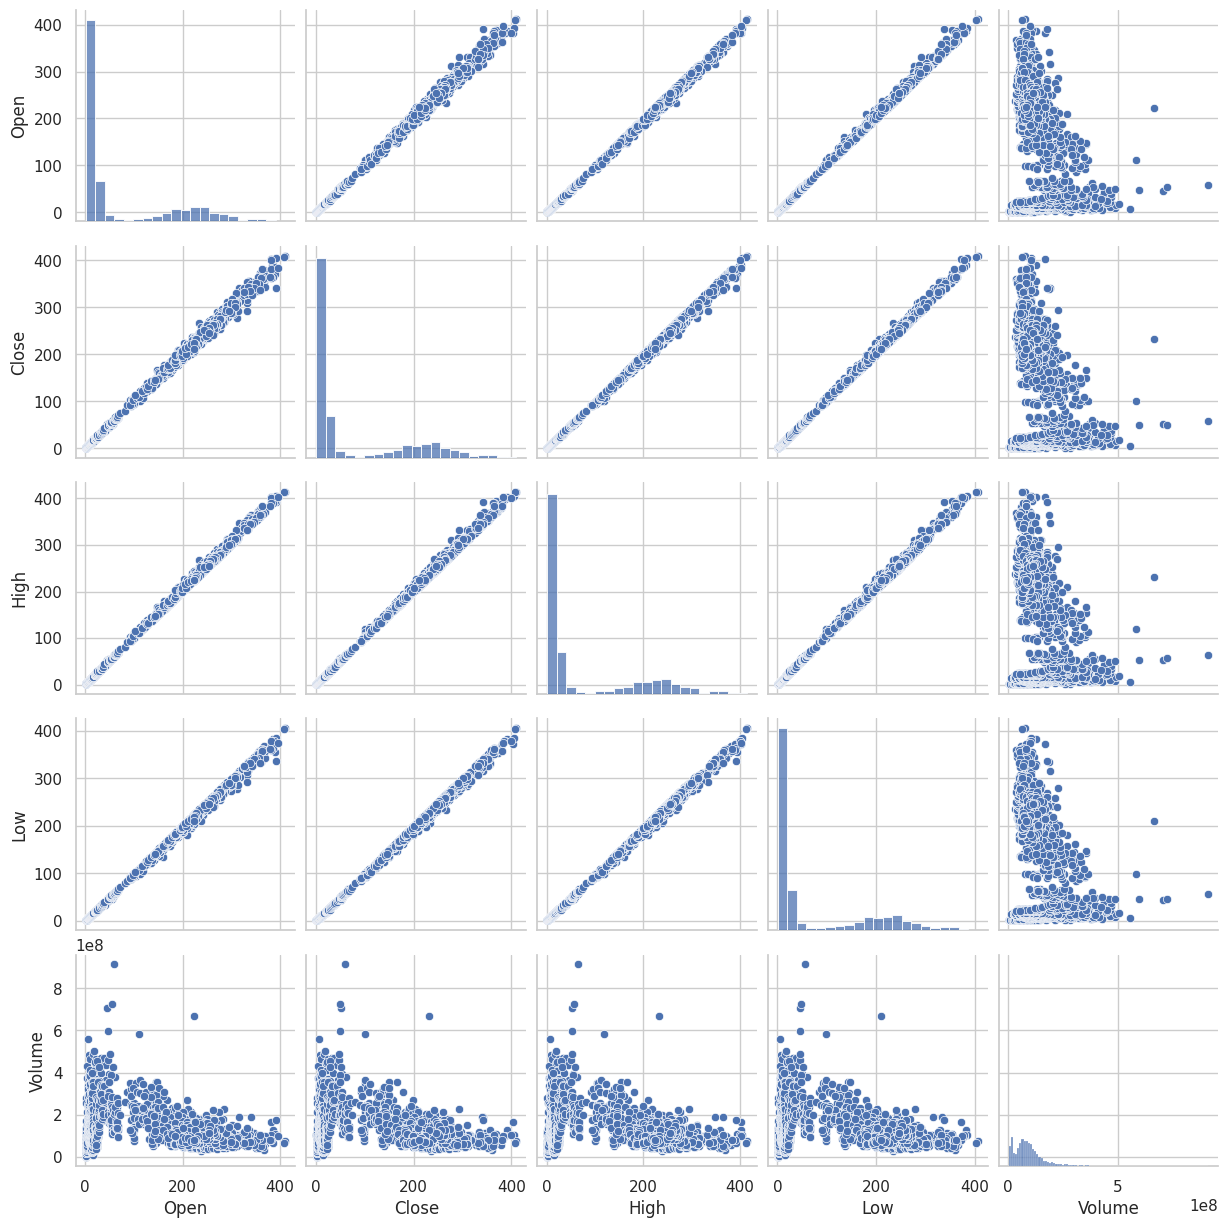

In [10]:
#Pairplot To Visualize relationships between Features
sns.pairplot(df[['Open' ,'Close' ,'High' ,'Low' ,'Volume']])
plt.show()

**Feature Engineering**

In [11]:
#Calculate Moving Average
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

#Calculate Daily Returns
df['Returns'] = df['Close'].pct_change()

#Calculate Volatility (STD of returns)
df['Volatility'] = df['Returns'].rolling(window=10).std()

#The New Features
print(df[['Date', 'Close', 'MA_10', 'MA_50', 'Returns', 'Volatility']].head(20))

         Date     Close     MA_10  MA_50   Returns  Volatility
0  2010-06-29  1.592667       NaN    NaN       NaN         NaN
1  2010-06-30  1.588667       NaN    NaN -0.002512         NaN
2  2010-07-01  1.464000       NaN    NaN -0.078473         NaN
3  2010-07-02  1.280000       NaN    NaN -0.125683         NaN
4  2010-07-06  1.074000       NaN    NaN -0.160937         NaN
5  2010-07-07  1.053333       NaN    NaN -0.019243         NaN
6  2010-07-08  1.164000       NaN    NaN  0.105064         NaN
7  2010-07-09  1.160000       NaN    NaN -0.003436         NaN
8  2010-07-12  1.136667       NaN    NaN -0.020115         NaN
9  2010-07-13  1.209333  1.272267    NaN  0.063929         NaN
10 2010-07-14  1.322667  1.245267    NaN  0.093716    0.088428
11 2010-07-15  1.326000  1.219000    NaN  0.002520    0.088519
12 2010-07-16  1.376000  1.210200    NaN  0.037707    0.086763
13 2010-07-19  1.460667  1.228267    NaN  0.061531    0.076903
14 2010-07-20  1.353333  1.256200    NaN -0.073483    0

**Modeling**

Mean Squared Error: 259.73619700830466


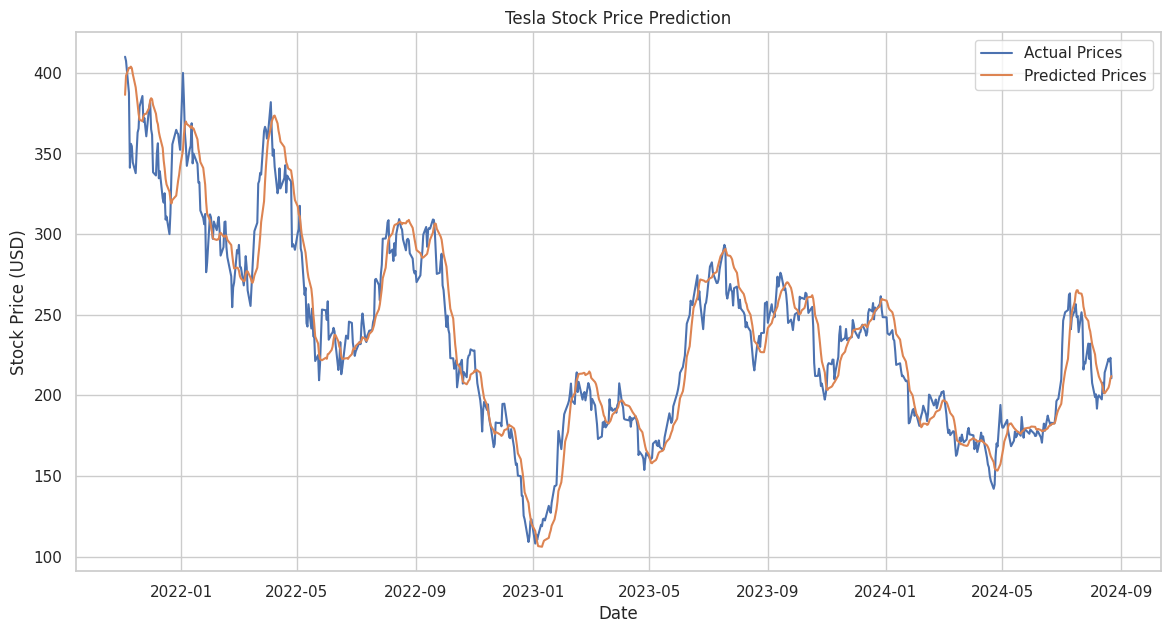

In [12]:
# Feature selection
features = ['MA_10', 'MA_50', 'Volatility']
target = 'Close'

# Prepare the data
X = df[features].dropna()
y = df[target][X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'][X_test.index], y_test, label='Actual Prices')
plt.plot(df['Date'][X_test.index], y_pred, label='Predicted Prices')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()